[2.03384161 4.77649234]


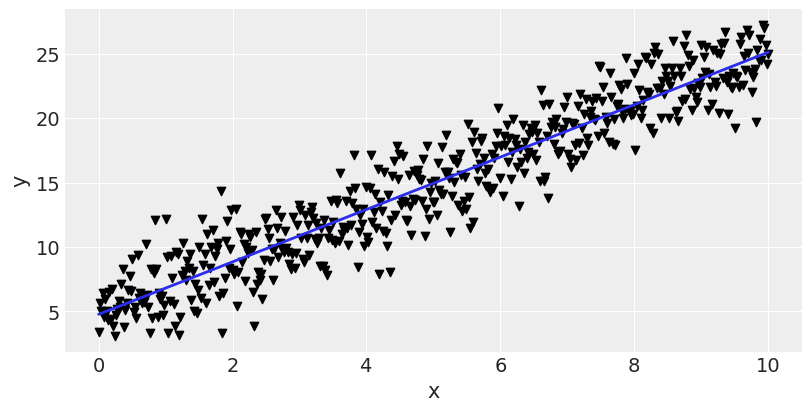

In [18]:
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import pandas as pd

x = np.linspace(0, 10, 500)
sigma = np.random.standard_normal(len(x))* 2 
y = 5 +  2* x + sigma 

reg = np.polyfit(x, y, 1)  #TODO: Add weights 
print(reg)

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c='black', marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


C:\Users\sbezo\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\sbezo\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\sbezo\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


C:\Users\sbezo\AppData\Local\Temp\ipykernel_6204\2739471855.py:10: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = pm.sample(100, step, start=start, progressbar=False)
C:\Users\sbezo\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_1, beta_0]
Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 142 seconds.
WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will defaul

Could not locate executable g77
Could not locate executable f77
Could not locate executable ifort
Could not locate executable ifl
Could not locate executable f90
Could not locate executable DF
Could not locate executable efl
Could not locate executable gfortran
Could not locate executable f95
Could not locate executable g95
Could not locate executable efort
Could not locate executable efc
Could not locate executable flang
don't know how to compile Fortran code on platform 'nt'


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


{'beta_0': 4.699954931336722, 'beta_1': 2.0427970605121053, 'sigma_log__': 0.7008332513251277, 'sigma': 2.0154313688587435}


C:\Users\sbezo\AppData\Local\Temp\ipykernel_6204\2739471855.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
C:\Users\sbezo\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:214: UserWarning: A valid var_name should be provided, found {'b', 'a', 's'} expected from {'sigma', 'beta_0', 'beta_1'}
  warnings.warn(


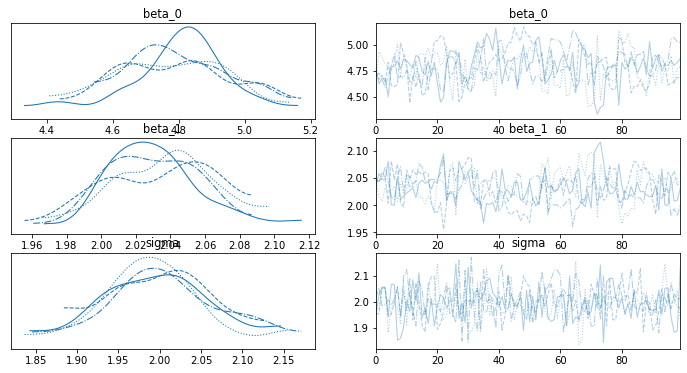

<Figure size 576x720 with 0 Axes>

In [3]:
 with pm.Model() as model:
        
    beta_0 = pm.Normal('beta_0', mu=5, sd=1)
    beta_1 = pm.Normal('beta_1', mu=2, sd=1)
    sigma = pm.InverseGamma('sigma',alpha=11, beta=15) #mean= 1.5 varience = .5^2
    y_est =  beta_0 + beta_1 * x
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(100, step, start=start, progressbar=False)
    print(trace[0])
    fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
    plt.figure(figsize=(8, 10))
    plt.show()
    

In [7]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\sbezo\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,4.791,0.163,4.493,5.087,0.014,0.010,137.0,199.0,1.02
beta_1,2.032,0.028,1.982,2.081,0.002,0.002,139.0,176.0,1.04
sigma,1.999,0.064,1.881,2.122,0.003,0.002,582.0,303.0,1.00


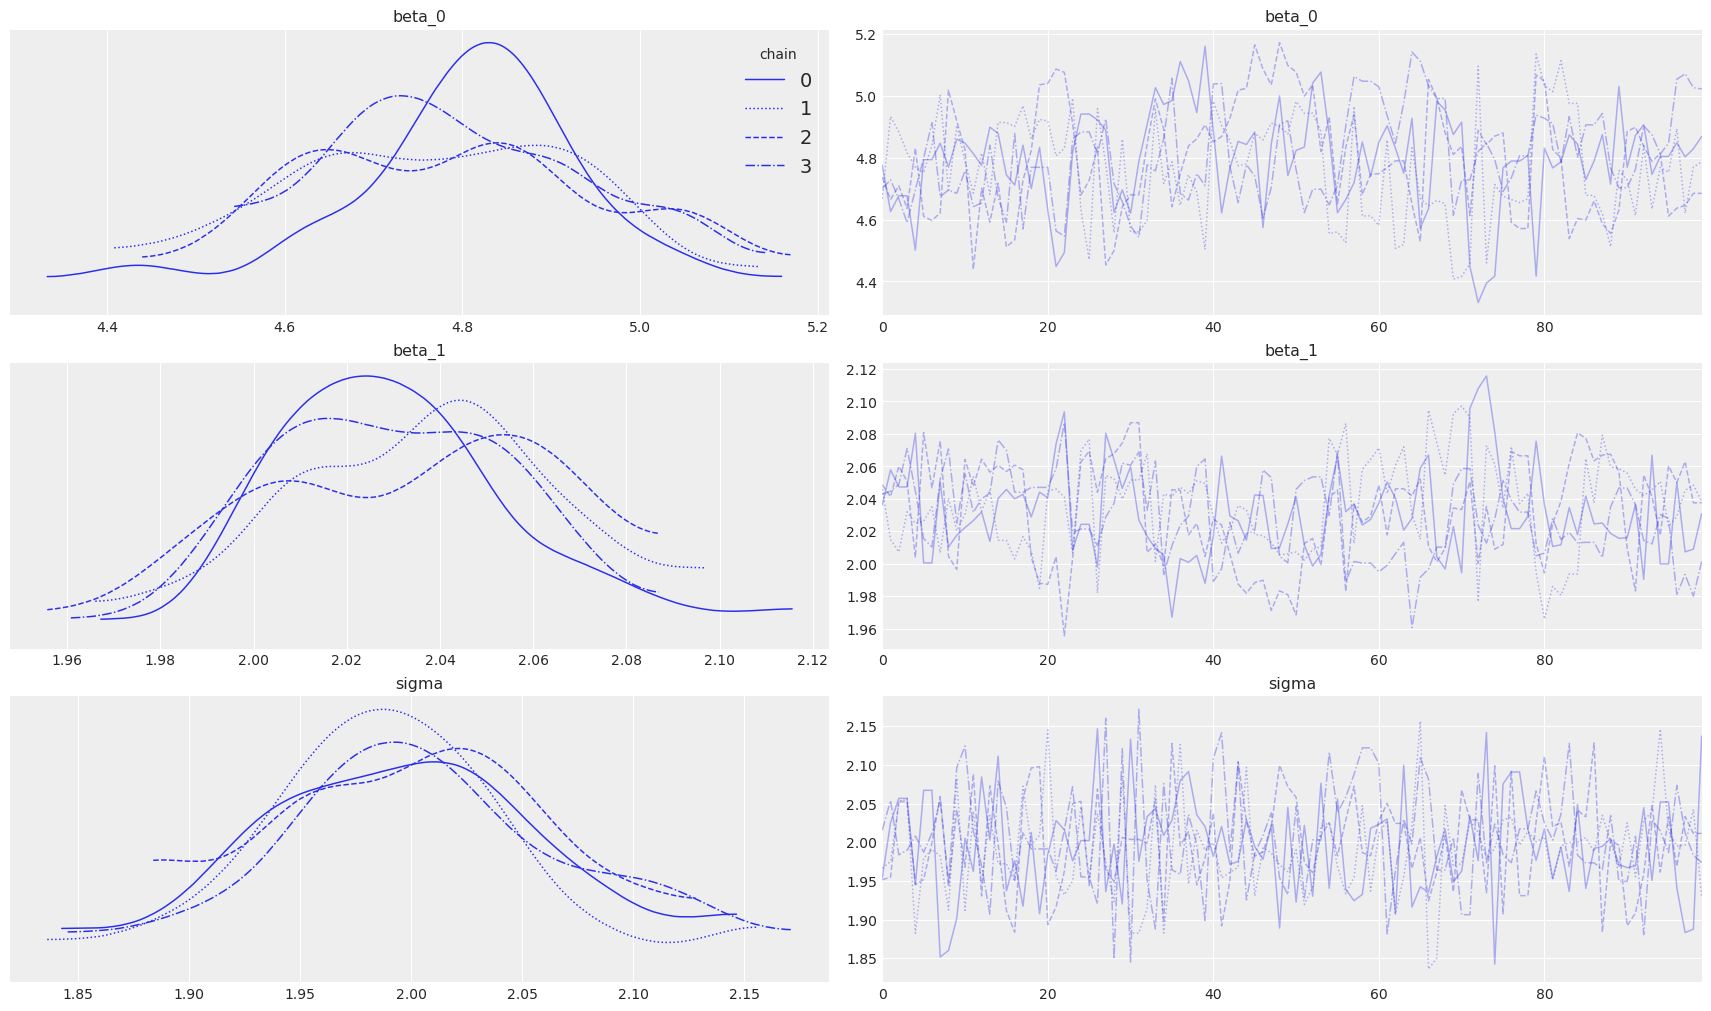

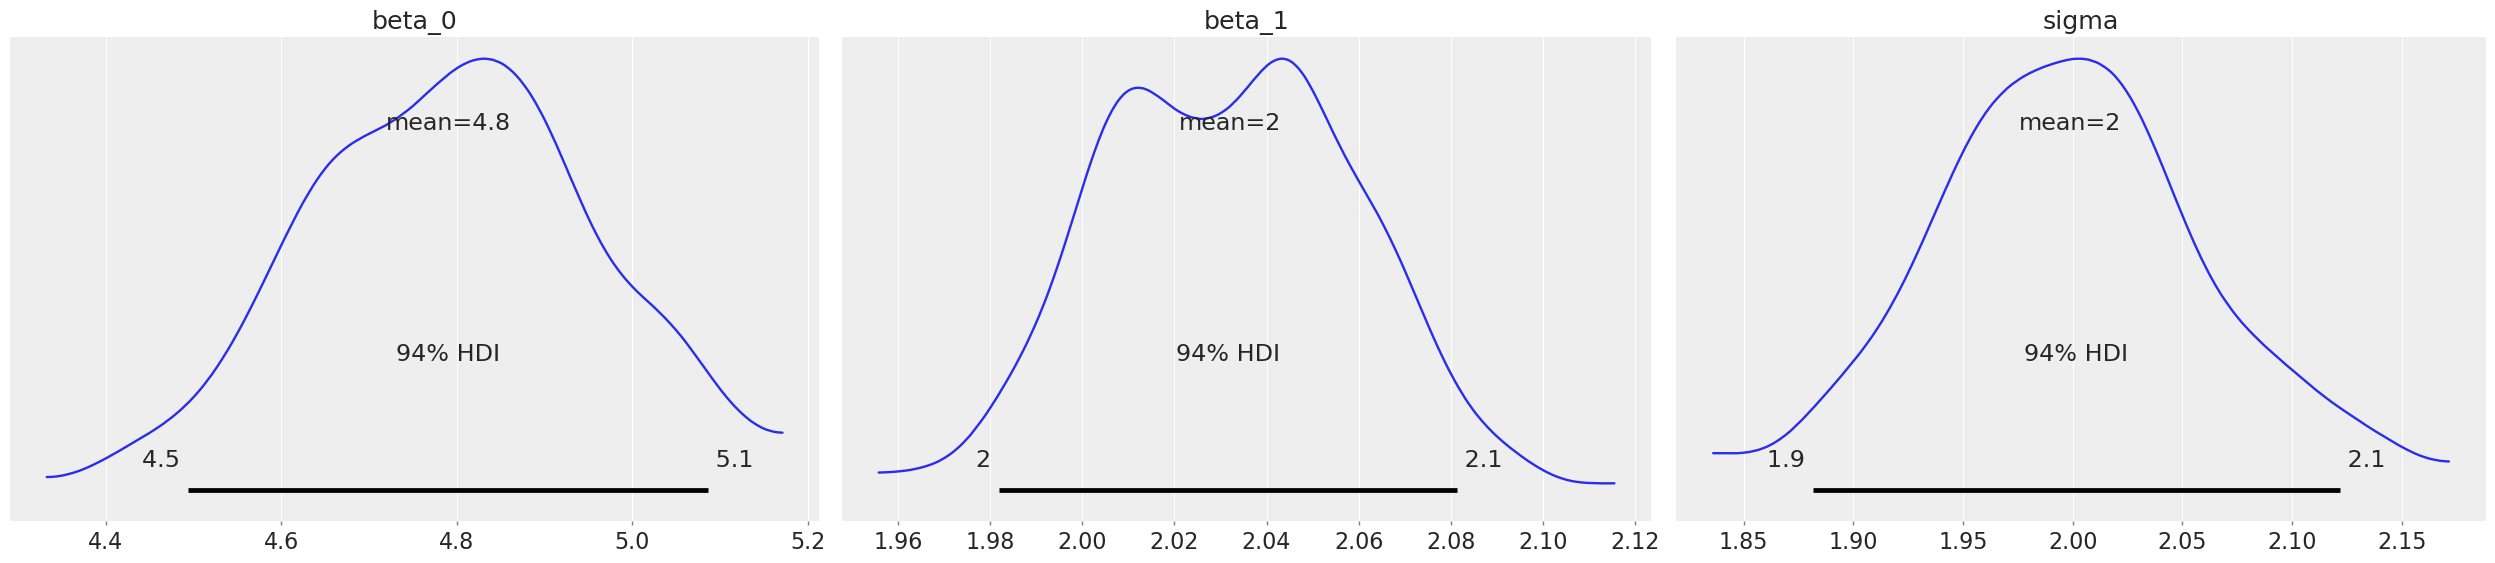

In [4]:
with model:
    ppc = pm.sample_posterior_predictive(trace, random_seed=42, progressbar=True)


with model: 
    trace_updated = az.from_pymc3(trace, posterior_predictive=ppc)
    
az.style.use("arviz-darkgrid")
with model:
  az.plot_trace(trace_updated, figsize=(17,10), legend=True)


az.style.use("arviz-darkgrid")
with model:
  az.plot_posterior(trace_updated,textsize=16)

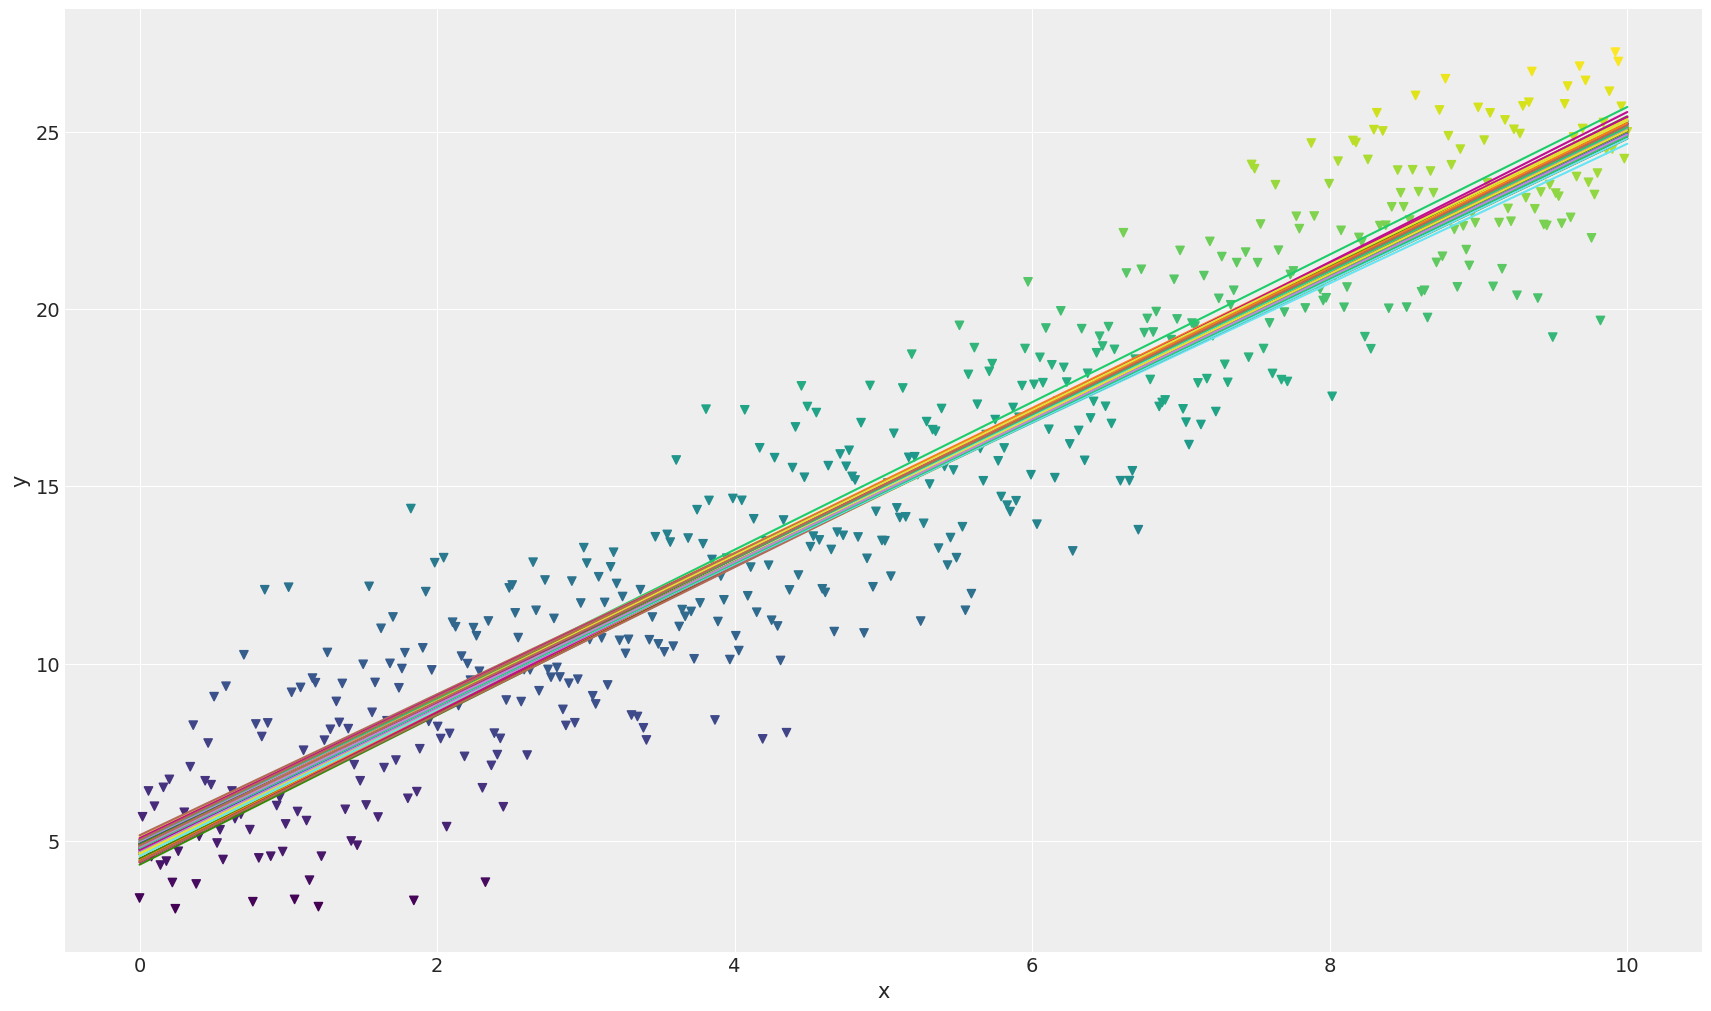

In [5]:
plt.figure(figsize=(17,10))
plt.scatter(x, y, c=y, marker='v')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

for i in range(len(trace)): 
    plt.plot(x, trace['beta_0'][i] + trace['beta_1'][i] * x) #TODO: Add uncertainity band, add credibility level, make color code meaningful

plt.show()

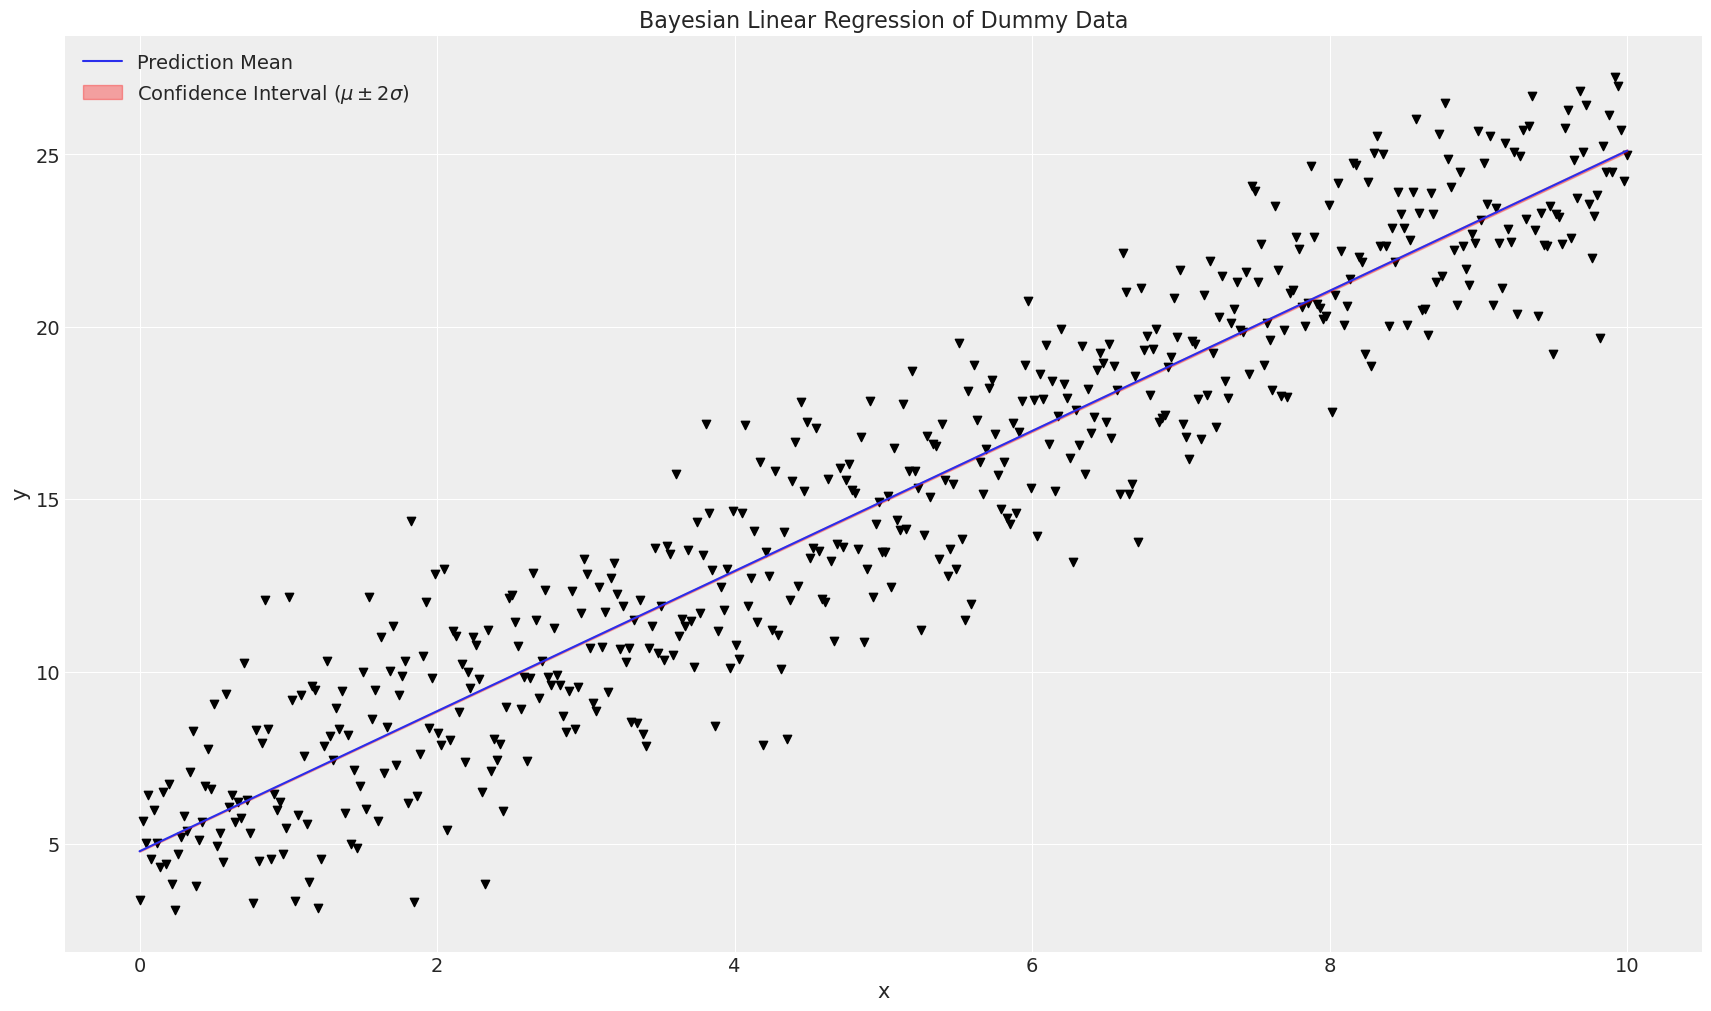

In [25]:
Z_0 = 1.96
beta_0_mean = 4.791
beta_0_std = 0.163
beta_1_mean = 2.032
beta_1_std = 0.028

x_new = np.linspace(0, 10, 100)
y_average = beta_0_mean + beta_1_mean * x

def confidence_interval(mean, std, Z, number_of_samples):
    upper = mean + Z * (std / (number_of_samples)**(1/2))
    lower = mean - Z * (std / (number_of_samples)**(1/2))
    return lower,upper

beta_0_ci = confidence_interval(beta_0_mean, beta_0_std, Z_0, 500)
beta_1_ci = confidence_interval(beta_1_mean, beta_1_std, Z_0, 500)
    
y_min = beta_0_ci[0] + beta_1_ci[0] * x

y_max = beta_0_ci[1] + beta_1_ci[1] * x

plt.figure(figsize=(17,10))
plt.scatter(x, y, c='black', marker='v')
plt.grid(True)
plt.title(label = 'Bayesian Linear Regression of Dummy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_average, label='Prediction Mean')
plt.legend()
plt.fill_between(x, y_min  , y_max  , color='r', alpha=.33, label= 'Confidence Interval ($\mu\pm2\sigma$)')
plt.legend(loc='upper left')


In [23]:
print(beta_0)

beta_0 ~ Normal
